Sequential API 모델 예시

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


Functional API 모델 예시

In [2]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_ = Input(shape=(4,))

x = Dense(8, activation='relu')(input_)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)

output_ = Dense(10, activation='softmax')(x)

model = Model(inputs=input_,  outputs=output_)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 1,058
Trainable params: 1,058
Non-trainable params: 0
_________________________________________________________________


다중입력에 대한 Functional API 예시

In [3]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 입력층 1 에 대한 신경망
input_1 = Input(shape=(4,))    

hidden_1 = Dense(8, activation='relu')(input_1)
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_1 = Model(inputs=input_1,  outputs=hidden_2)

# 입력층 2 에 대한 신경망
input_2 = Input(shape=(8,))    

hidden_3 = Dense(8, activation='relu')(input_2)

output_2 = Model(inputs=input_2,  outputs=hidden_3)

# 층 연결
result = concatenate([output_1.output, output_2.output])

# 출력층 정의
output_ = Dense(10, activation='softmax')(result)

# 최종 모델 구축
model = Model(inputs=[output_1.input, output_2.input],  outputs=output_)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 8)            40          input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 16)           144         dense_8[0][0]                    
____________________________________________________________________________________________

Functional API CNN Example - MNIST datasets

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


Functional API 방식으로 Model 구축

In [7]:
input_ = Input(shape=(28,28,1))

x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_,  outputs=output_)

In [8]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179

In [9]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 35s 9ms/step - loss: 0.2463 - accuracy: 0.9254 - val_loss: 0.0567 - val_accuracy: 0.9811
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0886 - accuracy: 0.9734 - val_loss: 0.0377 - val_accuracy: 0.9874
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0311 - val_accuracy: 0.9881
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0329 - val_accuracy: 0.9890
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0309 - val_accuracy: 0.9897
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch

In [10]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0278 - accuracy: 0.9932


[0.02779889479279518, 0.9932000041007996]

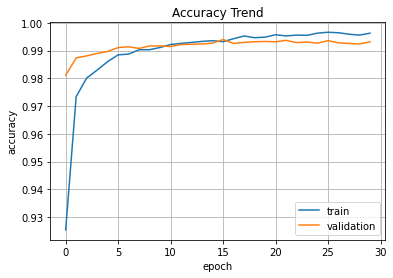

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

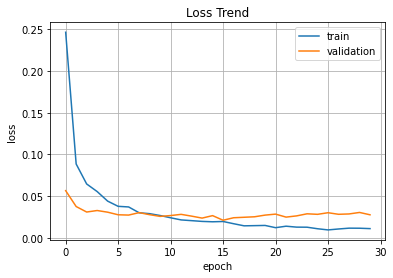

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()